### Regression

In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.preprocessing import MinMaxScaler,StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Boston.csv")
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
df.rename({"medv":"Price"},axis=1,inplace=True)

In [7]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

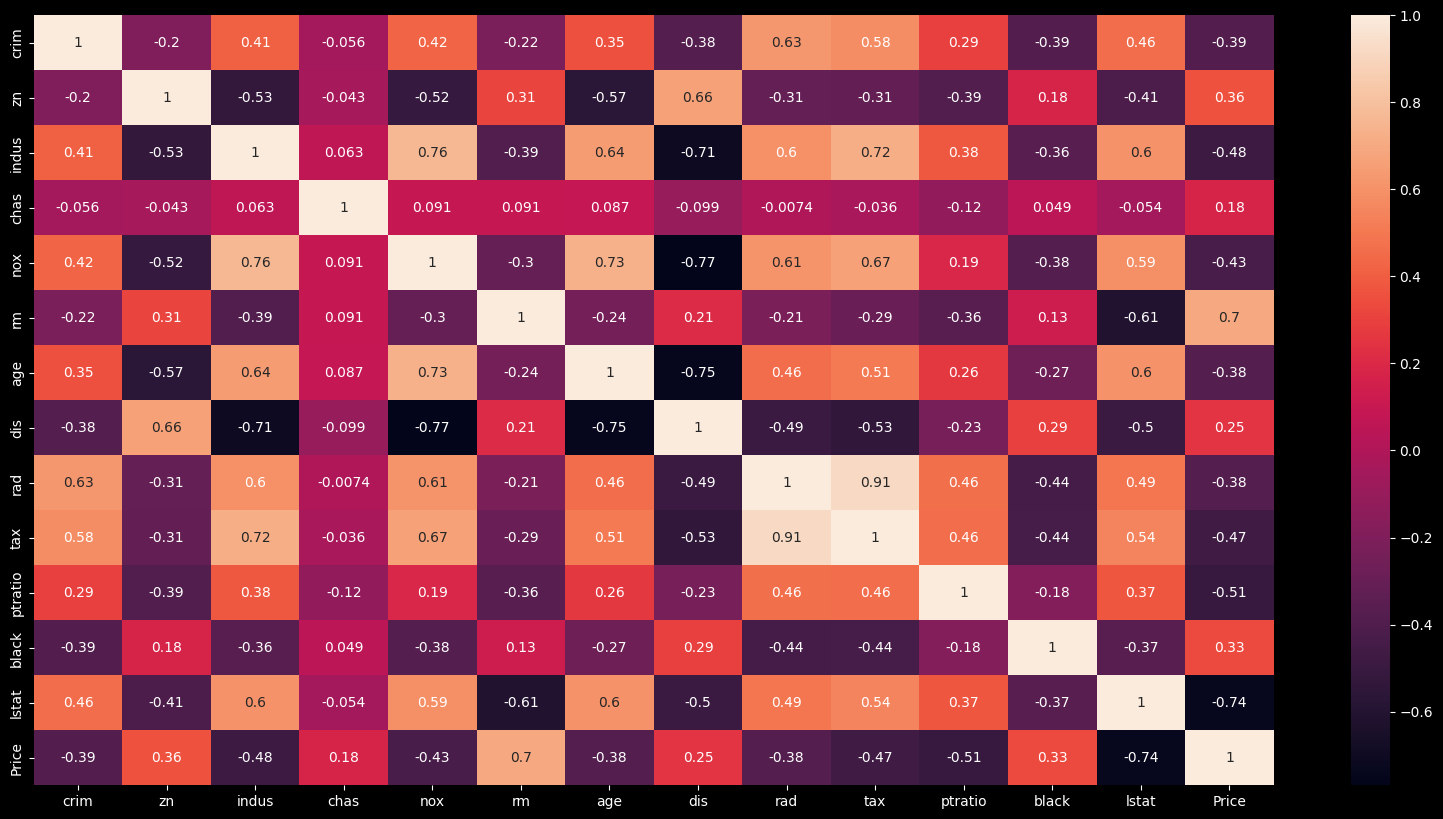

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

Train Test Split 

In [12]:
x=df.drop("Price",axis=1)
y=df["Price"]

In [13]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [14]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

Model Training

In [16]:
knn_reg=KNeighborsRegressor(n_neighbors=5,p=1)
knn_reg.fit(x_train,y_train)


KNeighborsRegressor(p=1)

Evalaution 

In [17]:
y_pred_testing= knn_reg.predict(x_test)
y_pred_testing[:5]


array([24.5 , 30.26, 13.46, 28.  , 17.16])

In [18]:
y_test[:5]

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: Price, dtype: float64

Testing Data Evaluation 

In [19]:
mse = mean_squared_error(y_test,y_pred_testing)
print("Mean squared error:",mse)
print("*"*80)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:",rmse)
print("*"*80)
mae = mean_absolute_error(y_test,y_pred_testing)
print("Mean absolute error:",mae)
print("*"*80)
r_squared=r2_score(y_test,y_pred_testing)
print("R2 Score is :",r_squared)

Mean squared error: 22.02435294117647
********************************************************************************
Root Mean Squared Error: 4.693011074052188
********************************************************************************
Mean absolute error: 3.3298039215686273
********************************************************************************
R2 Score is : 0.6996697566655379


Training Data Evaluation

In [20]:
y_pred_train=knn_reg.predict(x_train)
mse=mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error:",mse)
print("*"*80)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:",rmse)
print("*"*80)
mae=mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error:",mae)
print("*"*80)
r_squared=r2_score(y_train,y_pred_train)
print("R2 SCore is :",r_squared)

Mean Squared Error: 23.512329702970295
********************************************************************************
Root Mean Squared Error: 4.8489514024137526
********************************************************************************
Mean Absolute Error: 3.2943069306930695
********************************************************************************
R2 SCore is : 0.729349505538192


In [21]:
k_values = range(2,21)
list(k_values)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

Text(0.5, 1.0, 'Comaprison of R2 Score of Training and Testing Data')

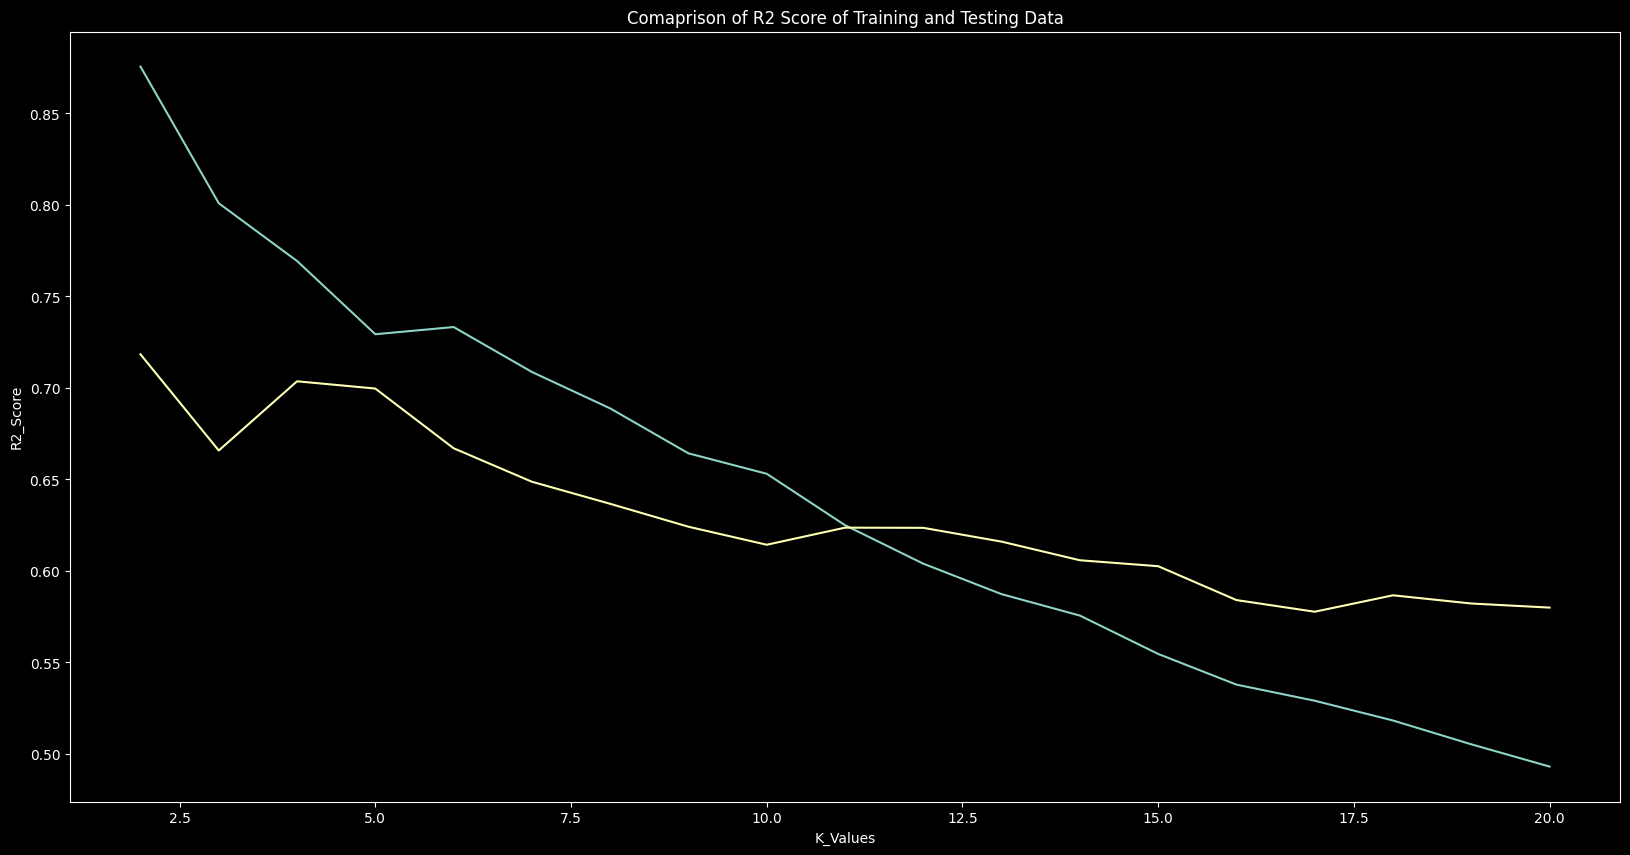

In [22]:
r2_train_list_p1 = []
r2_testing_list_p1 = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(x_train,y_train)
    r2_training = knn_reg.score(x_train,y_train)
    r2_train_list_p1.append(r2_training)

    r2_testing = knn_reg.score(x_test,y_test)
    r2_testing_list_p1.append(r2_testing)


plt.figure(figsize=(20,10))

plt.plot(k_values,r2_train_list_p1)
plt.plot(k_values,r2_testing_list_p1)

plt.xlabel("K_Values")
plt.ylabel("R2_Score")
plt.title("Comaprison of R2 Score of Training and Testing Data")


For p=2

Text(0.5, 1.0, 'Comaprison of R2 Score of Training and Testing Data')

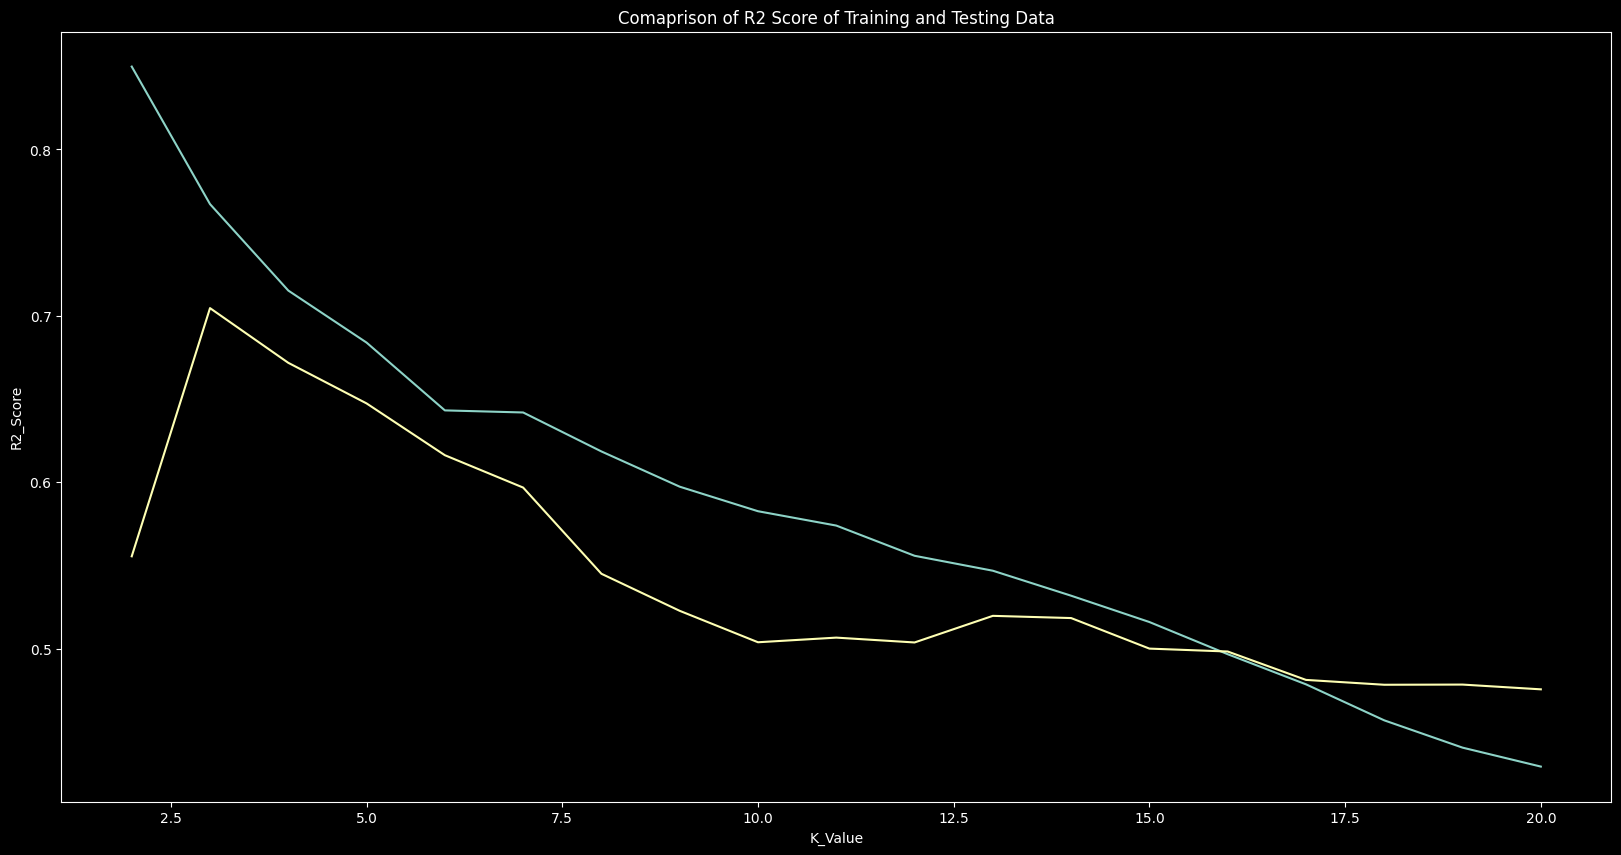

In [23]:
r2_train_list_p2 = []
r2_testing_list_p2 = []

for k in k_values:
    knn_reg=KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(x_train,y_train)
    r2_training=knn_reg.score(x_train,y_train)
    r2_train_list_p2.append(r2_training)

    r2_testing=knn_reg.score(x_test,y_test)
    r2_testing_list_p2.append(r2_testing)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list_p2)
plt.plot(k_values,r2_testing_list_p2)
plt.xlabel("K_Value")
plt.ylabel("R2_Score")
plt.title("Comaprison of R2 Score of Training and Testing Data")


Normalization

In [24]:
normal_scaling = MinMaxScaler()
normal_scaling.fit(x_train)
normal_train_df=pd.DataFrame(normal_scaling.fit_transform(x_train),columns=x_train.columns)
normal_train_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.168763,0.00,0.642963,0.0,0.471193,0.293065,0.972194,0.088307,1.000000,0.914122,0.808511,0.880428,0.639625
1,0.006950,0.00,0.274074,0.0,0.314815,0.400854,0.552008,0.306359,0.130435,0.229008,0.893617,0.996772,0.185982
2,0.000288,0.35,0.197037,0.0,0.108848,0.440919,0.210093,0.501150,0.000000,0.223282,0.457447,0.912628,0.168322
3,0.079146,0.00,0.642963,0.0,0.471193,0.455562,0.846550,0.081132,1.000000,0.914122,0.808511,0.005547,0.594923
4,0.008056,0.00,0.274074,0.0,0.314815,0.379093,0.685891,0.242514,0.130435,0.229008,0.893617,0.984997,0.263521
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.001822,0.00,0.289630,0.0,0.277778,0.401261,0.916581,0.098337,0.173913,0.375954,0.882979,0.996898,0.467163
400,0.003261,0.20,0.230370,0.0,0.162551,0.405328,0.403708,0.300030,0.086957,0.068702,0.638298,0.979197,0.310982
401,0.000067,0.80,0.047037,0.0,0.102881,0.563758,0.276004,0.656039,0.130435,0.177481,0.468085,0.984972,0.117550
402,0.125342,0.00,0.642963,0.0,0.730453,0.562538,0.944387,0.090489,1.000000,0.914122,0.808511,0.276186,0.594371


Without Hyperparameter tuning

In [25]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(normal_train_df,y_train)


KNeighborsRegressor()

Evaluation on Training Data

In [26]:
y_pred_train=knn_reg.predict(normal_train_df)
mse=mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error: ",mse)
print("*"*80)
rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)
print("*"*80)
mae=mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error: ",mae)
print("*"*80)
r_squared=r2_score(y_train,y_pred_train)
print("R2 Score Is : ",r_squared)

Mean Squared Error:  13.918433663366336
********************************************************************************
Root Mean Squared Error:  3.730741704187833
********************************************************************************
Mean Absolute Error:  2.421188118811881
********************************************************************************
R2 Score Is :  0.8397848702909227


Normalizing Testing Data 

In [28]:
array = normal_scaling.transform(x_test)
normal_testing_df=pd.DataFrame(array,columns=x_test.columns)
normal_testing_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.000930,0.0,0.122593,0.0,0.257202,0.519219,0.836251,0.137921,0.173913,0.208015,0.425532,0.996470,0.201711
1,0.000533,0.4,0.210000,1.0,0.127572,0.588774,0.308960,0.268076,0.130435,0.127863,0.531915,1.000000,0.049669
2,0.001087,0.0,1.000000,0.0,0.460905,0.431157,0.987642,0.067155,0.130435,1.000000,0.797872,0.982879,0.450883
3,0.000928,0.0,0.372963,0.0,0.057613,0.447834,0.050463,0.378079,0.130435,0.225191,0.702128,0.984896,0.104581
4,0.057112,0.0,0.642963,0.0,0.674897,0.495017,0.915551,0.112632,1.000000,0.914122,0.808511,0.970220,0.428808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.211336,0.0,0.642963,0.0,0.436214,0.155583,1.000000,0.038584,1.000000,0.914122,0.808511,0.071789,0.900662
98,0.161989,0.0,0.642963,0.0,0.730453,0.528371,0.930999,0.079386,1.000000,0.914122,0.808511,0.068511,0.450331
99,0.157830,0.0,0.642963,0.0,0.436214,0.568233,1.000000,0.036183,1.000000,0.914122,0.808511,0.087574,0.537804
100,0.000481,0.0,0.138889,0.0,0.131687,0.437665,0.434604,0.299866,0.086957,0.114504,0.627660,0.997705,0.307119


Evaluation on Testing Data 

In [29]:
y_pred_testing=knn_reg.predict(normal_testing_df)
mse = mean_squared_error(y_test,y_pred_testing)
print("Mean squared error:",mse)
print("*"*80)
rmse = np.sqrt(mse)
print("Root mean squared error:",rmse)
print("*"*80)
mae=mean_absolute_error(y_test,y_pred_testing)
print("Mean absolute error:",mae)
print("*"*80)
r_squared=r2_score(y_test,y_pred_testing)
print("R2 SCore is :",r_squared)

Mean squared error: 21.7121843137255
********************************************************************************
Root mean squared error: 4.659633495643783
********************************************************************************
Mean absolute error: 2.6566666666666676
********************************************************************************
R2 SCore is : 0.7039265754739785


Find Best Value of K

for p=1

In [30]:
k_values

range(2, 21)

Text(0.5, 1.0, 'Comparison of R2 Score of Training and Testing Data')

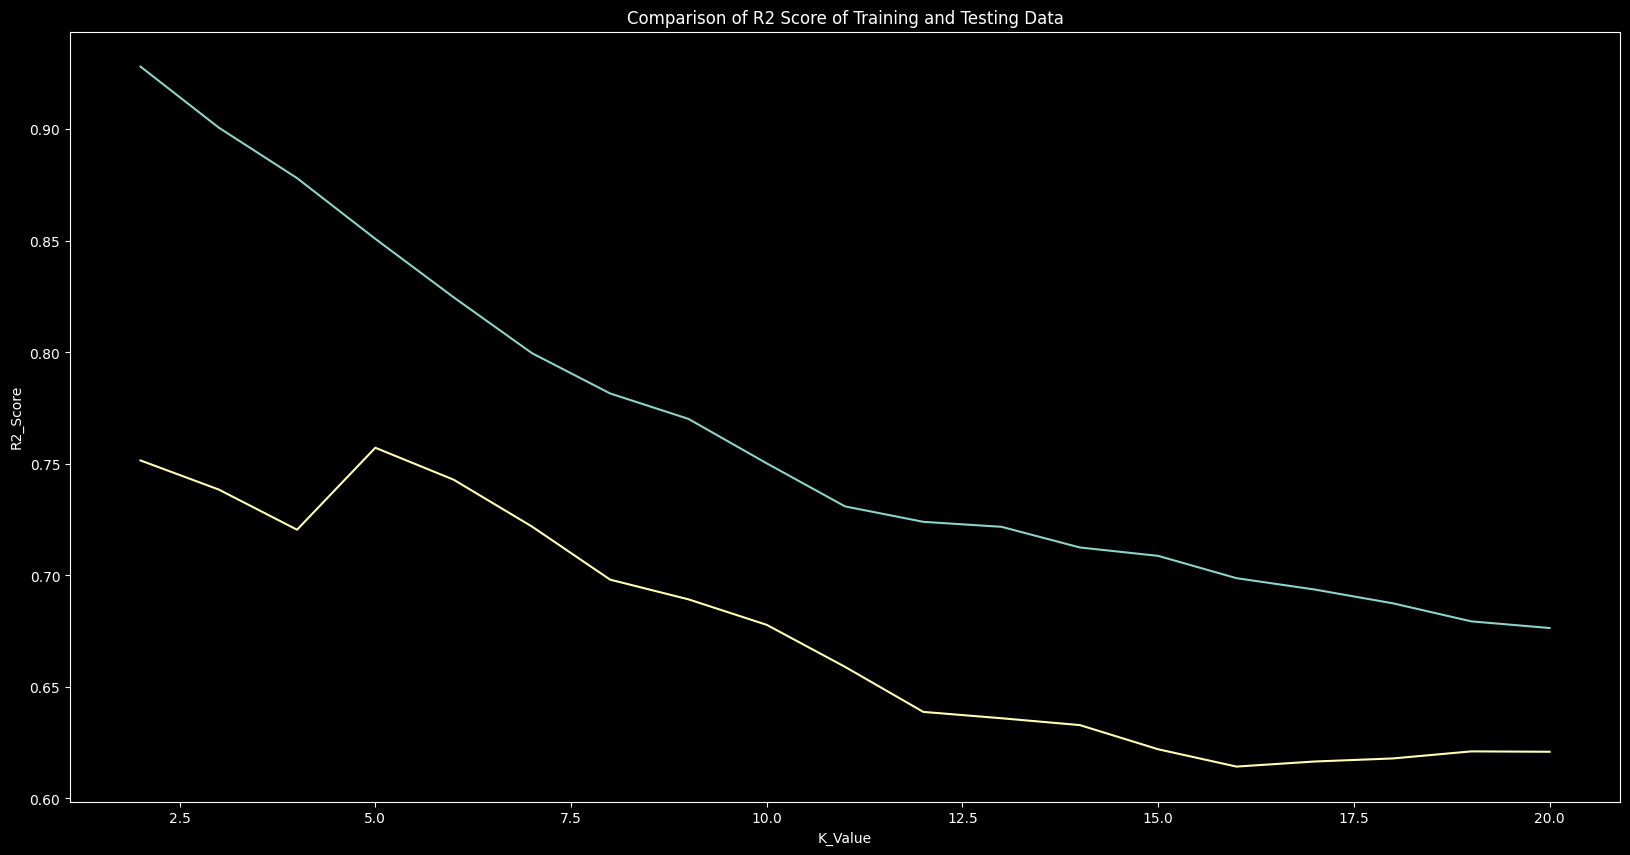

In [31]:
r2_train_list_p1 = []
r2_testing_list_p1 = []
for k in k_values:
    knn_reg=KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(normal_train_df,y_train)
    r2_training=knn_reg.score(normal_train_df,y_train)
    r2_train_list_p1.append(r2_training)

    r2_testing=knn_reg.score(normal_testing_df,y_test)
    r2_testing_list_p1.append(r2_testing)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list_p1)
plt.plot(k_values,r2_testing_list_p1)
plt.xlabel("K_Value")
plt.ylabel("R2_Score")
plt.title("Comparison of R2 Score of Training and Testing Data")

For p=2

Text(0.5, 1.0, 'Comparison of R2 Score of Training and Testing Data')

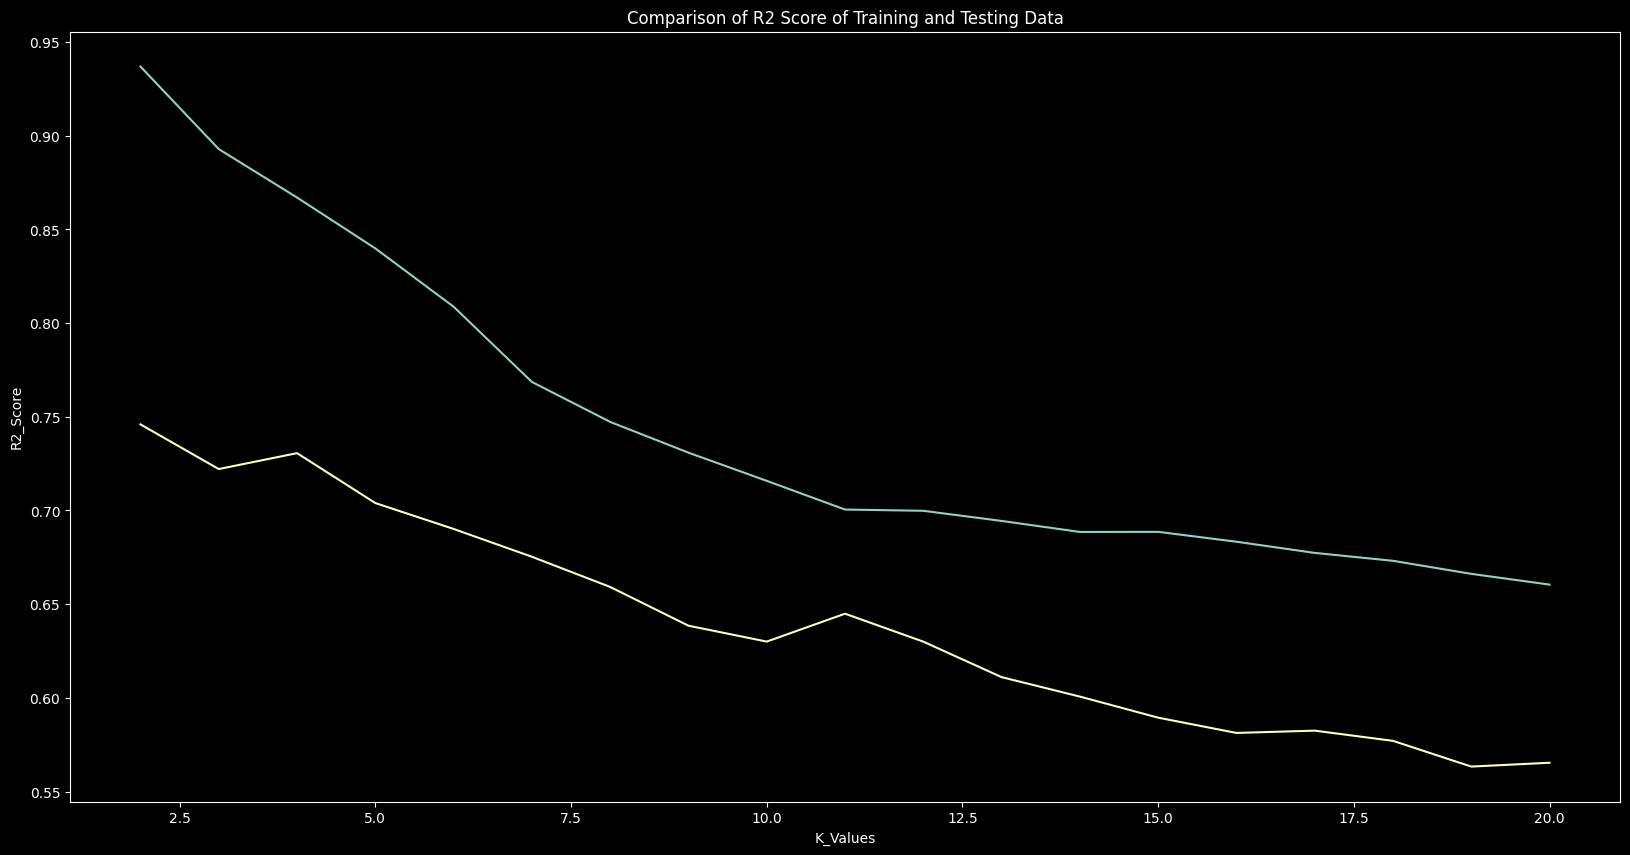

In [32]:
r2_train_list_p2 = []
r2_testing_list_p2 = []
for k in k_values:
    knn_reg=KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(normal_train_df,y_train)
    r2_training=knn_reg.score(normal_train_df,y_train)
    r2_train_list_p2.append(r2_training)

    r2_testing=knn_reg.score(normal_testing_df,y_test)
    r2_testing_list_p2.append(r2_testing)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list_p2)
plt.plot(k_values,r2_testing_list_p2)
plt.xlabel("K_Values")
plt.ylabel("R2_Score")
plt.title("Comparison of R2 Score of Training and Testing Data")

Standardization 

In [33]:
std_scaling = StandardScaler()
array=std_scaling.fit_transform(x_train)
std_train_df=pd.DataFrame(array,columns=x_train.columns)
std_train_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.387850,-0.500320,-0.352167,-0.278089,-0.310348,-0.677264,0.834884,-0.750355,-0.507797,-0.120700,1.159817,0.430731,0.873419
400,-0.373414,0.364589,-0.584520,-0.278089,-0.786706,-0.649038,-0.946216,0.291651,-0.740922,-1.090773,0.126546,0.353970,0.076412
401,-0.405470,2.959318,-1.303361,-0.278089,-1.033391,0.450354,-1.389703,2.130899,-0.624360,-0.747331,-0.592251,0.379010,-0.910692
402,0.851897,-0.500320,1.033237,-0.278089,1.561057,0.441886,0.931450,-0.790898,1.706891,1.578434,0.845343,-2.694586,1.522570


In [34]:
array1=std_scaling.fit_transform(x_test)
std_testing_df=pd.DataFrame(array1,columns=x_test.columns)
std_testing_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.476787,-0.440186,-1.149219,-0.25,-0.348009,0.386286,0.537480,-0.548087,-0.582846,-0.729893,-1.338941,0.413084,-0.608716
1,-0.481548,1.228922,-0.796429,4.00,-0.930972,0.904026,-1.243458,0.167253,-0.692532,-0.967732,-0.780821,0.428606,-1.373038
2,-0.474906,-0.440186,2.392130,-0.25,0.568076,-0.269215,1.048804,-0.937018,-0.692532,1.620178,0.614479,0.353326,0.643885
3,-0.476806,-0.440186,-0.138686,-0.25,-1.245586,-0.145078,-2.116535,0.771841,-0.692532,-0.678928,0.112171,0.362195,-1.096995
4,0.196583,-0.440186,0.951075,-0.25,1.530427,0.206137,0.805317,-0.687076,1.501204,1.365351,0.670291,0.297669,0.532912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2.045016,-0.440186,0.951075,-0.25,0.457035,-2.320494,1.090545,-1.094050,1.501204,1.365351,0.670291,-3.652597,2.904947
98,1.453580,-0.440186,0.951075,-0.25,1.780268,0.454410,0.857492,-0.869797,1.501204,1.365351,0.670291,-3.667010,0.641110
99,1.403721,-0.440186,0.951075,-0.25,0.457035,0.751127,1.090545,-1.107244,1.501204,1.365351,0.670291,-3.583193,1.080838
100,-0.482162,-0.440186,-1.083444,-0.25,-0.912465,-0.220771,-0.819094,0.341977,-0.802219,-1.007372,-0.278513,0.418517,-0.078823


In [35]:
knn_reg=KNeighborsRegressor()
knn_reg.fit(std_train_df,y_train)


KNeighborsRegressor()

Model Evaluation Of Training Data

In [36]:
y_pred_training=knn_reg.predict(std_train_df)
mse=mean_squared_error(y_train,y_pred_training)
print("Mean squared error:",mse)
print("*"*80)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
print("*"*80)
mae=mean_absolute_error(y_train,y_pred_training)
print("Mean absolute error:",mae)
print("*"*80)
r_squared=r2_score(y_train,y_pred_training)
print("R2 Score is :",r_squared)

Mean squared error: 13.040274257425743
********************************************************************************
Root mean squared error: 3.611131991138754
********************************************************************************
Mean absolute error: 2.35470297029703
********************************************************************************
R2 Score is : 0.8498933657244521


Model Evaluation on Testing Data

In [37]:
y_pred_testing=knn_reg.predict(std_testing_df)
mse=mean_squared_error(y_test,y_pred_testing)
print("Mean squared error: ", mse)
print("*"*80)
rmse=np.sqrt(mse)
print("Root mean squared error: ", rmse)
print("*"*80)
mae=mean_absolute_error(y_test,y_pred_testing)
print("Mean absolute error: ", mae)
print("*"*80)
r_squared=r2_score(y_test,y_pred_testing)
print("R2 Score is : ", r_squared)

Mean squared error:  21.42554117647059
********************************************************************************
Root mean squared error:  4.628773182655485
********************************************************************************
Mean absolute error:  2.724901960784313
********************************************************************************
R2 Score is :  0.707835321551189


To find Best value of k

for p=1

Text(0.5, 1.0, 'Comparison of R2 Score of Training and Testing Data')

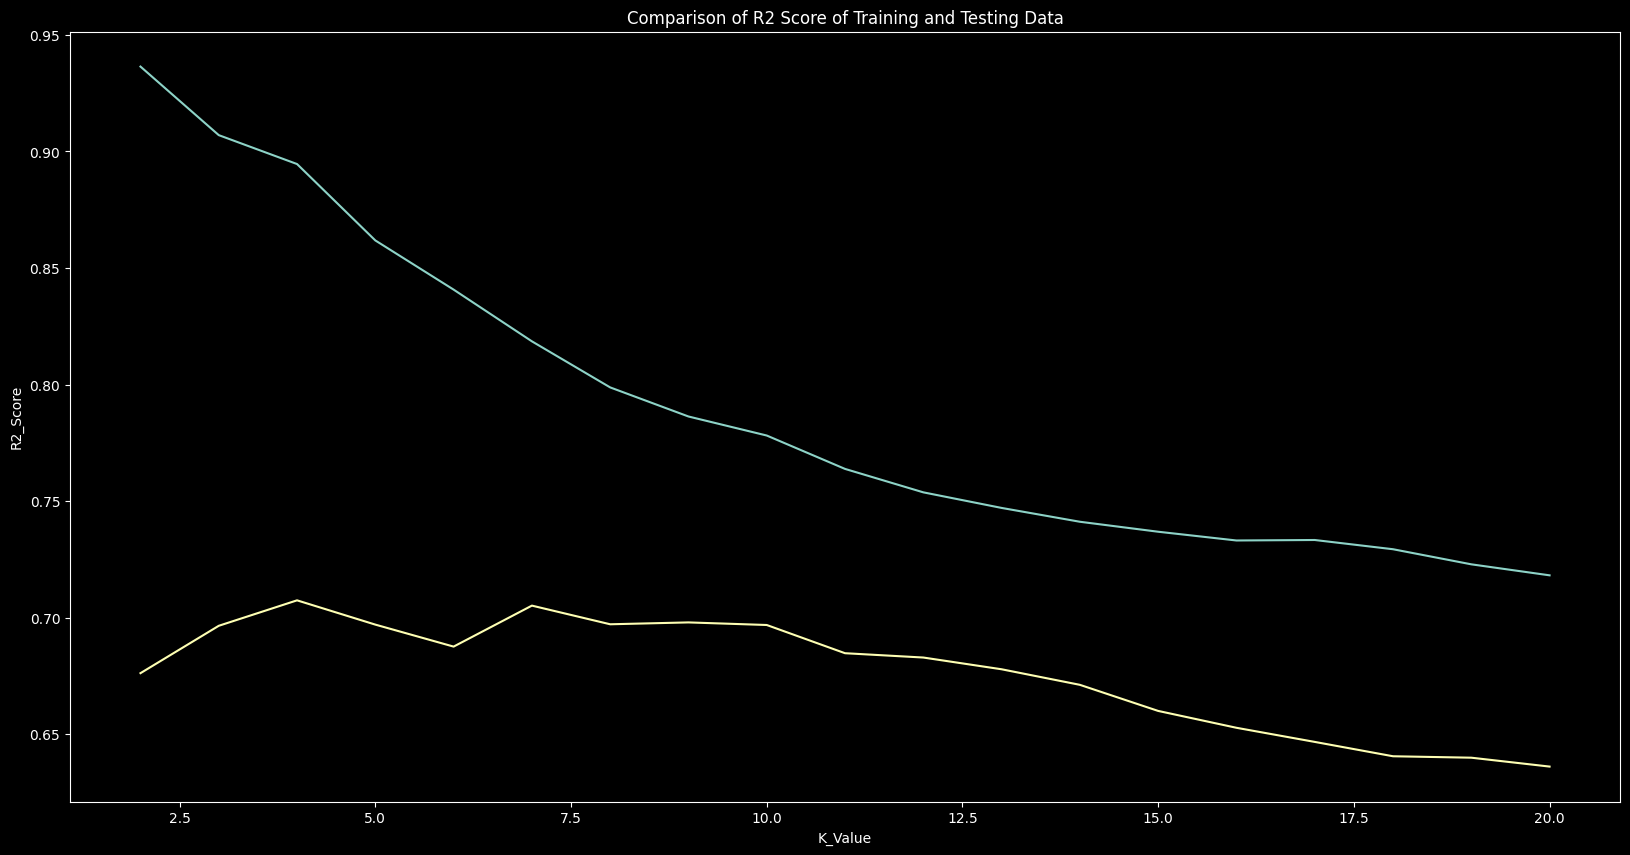

In [39]:
r2_train_list_p1 = []
r2_testing_list_p1 = []
for k in k_values:
    knn_reg=KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(std_train_df,y_train)
    r2_training=knn_reg.score(std_train_df,y_train)
    r2_train_list_p1.append(r2_training)

    r2_testing=knn_reg.score(std_testing_df,y_test)
    r2_testing_list_p1.append(r2_testing)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list_p1)
plt.plot(k_values,r2_testing_list_p1)
plt.xlabel("K_Value")
plt.ylabel("R2_Score")
plt.title("Comparison of R2 Score of Training and Testing Data")

For p=2

Text(0.5, 1.0, 'Comparison of R2 Score of Training and Testing Data')

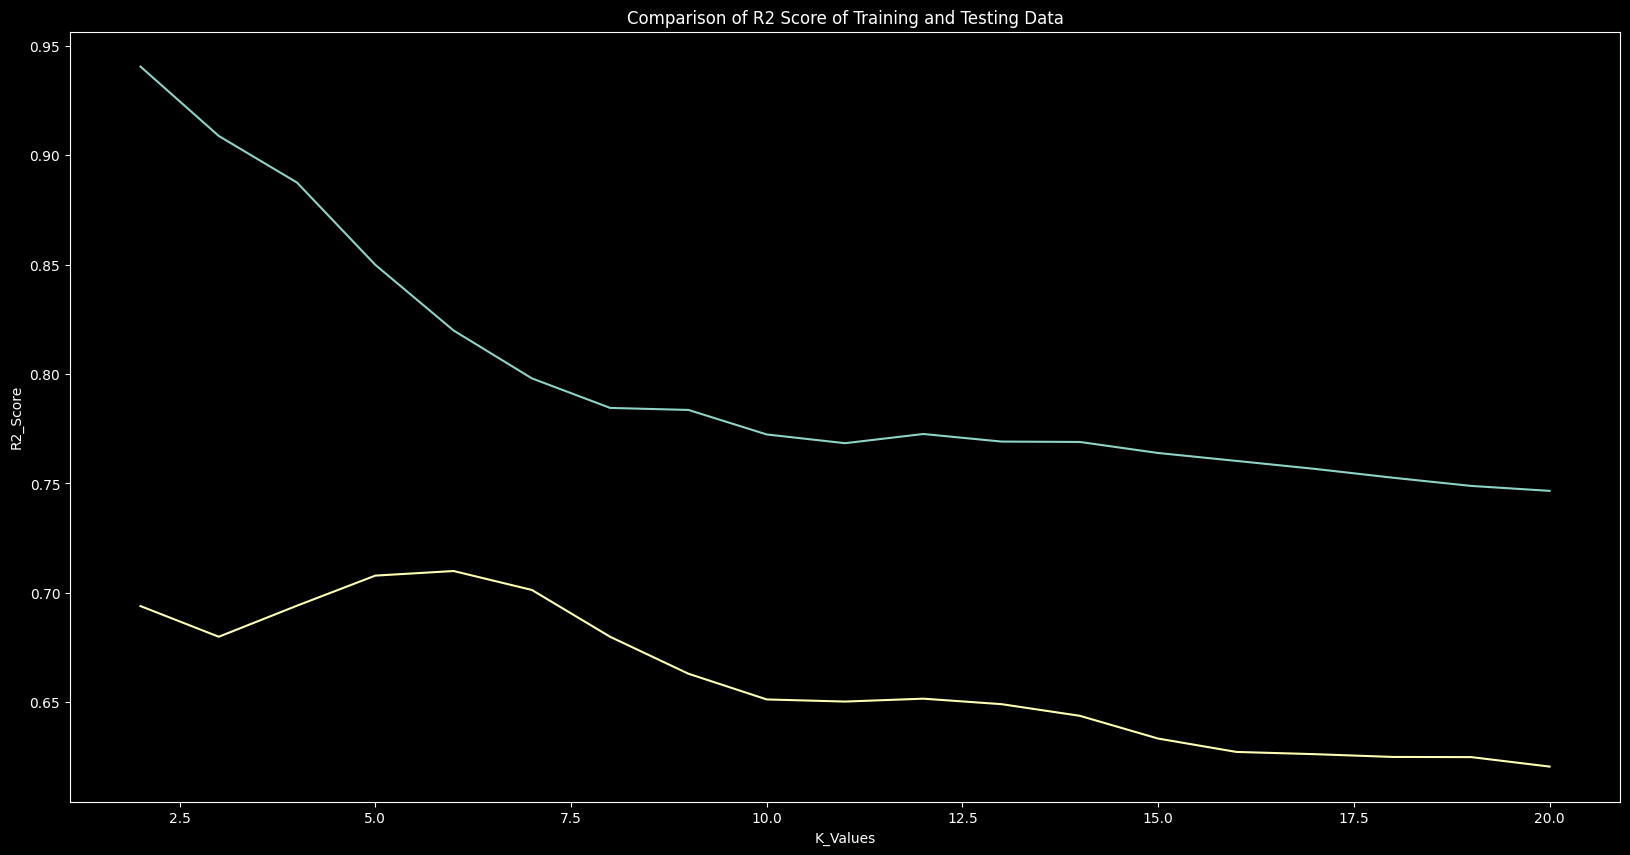

In [40]:
r2_train_list_p2 = []
r2_testing_list_p2 = []
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(std_train_df,y_train)
    r2_training=knn_reg.score(std_train_df,y_train)
    r2_train_list_p2.append(r2_training)

    r2_testing=knn_reg.score(std_testing_df,y_test)
    r2_testing_list_p2.append(r2_testing)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list_p2)
plt.plot(k_values,r2_testing_list_p2)
plt.xlabel("K_Values")
plt.ylabel("R2_Score")
plt.title("Comparison of R2 Score of Training and Testing Data")

### Classification

In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score

from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [42]:
df=pd.read_csv("diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [43]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=24,stratify=y)


Model Training

In [45]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)


KNeighborsClassifier()

Testing Data Evaluation

In [47]:
y_pred_testing=knn_clf.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred_testing)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_test,y_pred_testing)
print("Classification Report:\n",clf_report)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_testing)
print("Accuracy score :",accuracy)

Confusion Matrix :
 [[96 29]
 [32 35]]
********************************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76       125
           1       0.55      0.52      0.53        67

    accuracy                           0.68       192
   macro avg       0.65      0.65      0.65       192
weighted avg       0.68      0.68      0.68       192

********************************************************************************
Accuracy score : 0.6822916666666666


Training Data Evaluation

In [48]:
y_pred_training=knn_clf.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_training)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_train,y_pred_training)
print("Classification Report :\n",clf_report)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_training)
print("Accuracy :",accuracy)

Confusion Matrix :
 [[334  41]
 [ 67 134]]
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       375
           1       0.77      0.67      0.71       201

    accuracy                           0.81       576
   macro avg       0.80      0.78      0.79       576
weighted avg       0.81      0.81      0.81       576

********************************************************************************
Accuracy : 0.8125


Hyperparameters Tuning 

In [49]:
knn_clf = KNeighborsClassifier()
hyperparameters = {"n_neighbors":np.arange(3,30),
                   "p":[1,2]}
gscv_knn_clf = GridSearchCV(knn_clf,hyperparameters,cv=5)
gscv_knn_clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [50]:
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=7)

In [51]:
gscv_knn_clf.best_params_

{'n_neighbors': 7, 'p': 2}

In [52]:
knn_clf = gscv_knn_clf.best_estimator_
knn_clf.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=7)

Testing Data Evaluation 

In [53]:
y_pred_testing=knn_clf.predict(x_test)
cnf_matrix=confusion_matrix(y_test,y_pred_testing)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_test,y_pred_testing)
print("Classification Report:\n",clf_report)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_testing)
print("Accuracy score :",accuracy)

Confusion Matrix :
 [[96 29]
 [33 34]]
********************************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.77      0.76       125
           1       0.54      0.51      0.52        67

    accuracy                           0.68       192
   macro avg       0.64      0.64      0.64       192
weighted avg       0.67      0.68      0.67       192

********************************************************************************
Accuracy score : 0.6770833333333334


Training Data Evaluation 

In [54]:
y_pred_training=knn_clf.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_training)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_train,y_pred_training)
print("Classification Report :\n",clf_report)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_training)
print("Accuracy :",accuracy)

Confusion Matrix :
 [[333  42]
 [ 68 133]]
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       375
           1       0.76      0.66      0.71       201

    accuracy                           0.81       576
   macro avg       0.80      0.77      0.78       576
weighted avg       0.81      0.81      0.81       576

********************************************************************************
Accuracy : 0.8090277777777778


Preprocessing 

Normalization

In [56]:
x_df= df.drop("Outcome",axis=1)
x_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,50,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,52
3,150,66,23,94,28.1,0.167,21
4,150,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [57]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [58]:
normal_scalar = MinMaxScaler()
array = normal_scalar.fit_transform(x_df)
x_normal_df=pd.DataFrame(array,columns=x_df.columns)
x_normal_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.743719,0.409836,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.516667
3,0.753769,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.753769,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...
763,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


Train Test Split 

In [59]:
df_normal = x_normal_df.copy()
df_normal["Outcome"] = df["Outcome"]
df_normal

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.743719,0.409836,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.516667,1
3,0.753769,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.753769,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...
763,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [60]:
x=df_normal.drop("Outcome",axis=1)
y=df_normal["Outcome"]

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=24,stratify=y)


Model Training

In [62]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)


KNeighborsClassifier()

Testing Data Evaluation

In [63]:
y_pred_testing=knn_clf.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred_testing)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_test,y_pred_testing)
print("Classification Report:\n",clf_report)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_testing)
print("Accuracy score :",accuracy)

Confusion Matrix :
 [[100  25]
 [ 28  39]]
********************************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       125
           1       0.61      0.58      0.60        67

    accuracy                           0.72       192
   macro avg       0.70      0.69      0.69       192
weighted avg       0.72      0.72      0.72       192

********************************************************************************
Accuracy score : 0.7239583333333334


Training Data Evaluation

In [64]:
y_pred_training=knn_clf.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_training)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_train,y_pred_training)
print("Classification Report :\n",clf_report)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_training)
print("Accuracy :",accuracy)

Confusion Matrix :
 [[332  43]
 [ 59 142]]
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       375
           1       0.77      0.71      0.74       201

    accuracy                           0.82       576
   macro avg       0.81      0.80      0.80       576
weighted avg       0.82      0.82      0.82       576

********************************************************************************
Accuracy : 0.8229166666666666


Hyperparameters tuning on Normalized Data 

In [65]:
knn_clf = KNeighborsClassifier()
hyperparameters = {"n_neighbors":np.arange(3,30),
                   "p":[1,2]}
gscv_knn_clf = GridSearchCV(knn_clf,hyperparameters,cv=5)
gscv_knn_clf.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [66]:
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=19, p=1)

In [67]:
knn_clf=gscv_knn_clf.best_estimator_
knn_clf.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=19, p=1)

Testing Data Evaluation

In [68]:
y_pred_testing=knn_clf.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred_testing)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_test,y_pred_testing)
print("Classification Report:\n",clf_report)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_testing)
print("Accuracy score :",accuracy)

Confusion Matrix :
 [[108  17]
 [ 33  34]]
********************************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       125
           1       0.67      0.51      0.58        67

    accuracy                           0.74       192
   macro avg       0.72      0.69      0.69       192
weighted avg       0.73      0.74      0.73       192

********************************************************************************
Accuracy score : 0.7395833333333334


Training Data Evaluation

In [69]:
y_pred_training=knn_clf.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_training)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_train,y_pred_training)
print("Classification Report :\n",clf_report)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_training)
print("Accuracy :",accuracy)

Confusion Matrix :
 [[341  34]
 [ 86 115]]
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       375
           1       0.77      0.57      0.66       201

    accuracy                           0.79       576
   macro avg       0.79      0.74      0.75       576
weighted avg       0.79      0.79      0.78       576

********************************************************************************
Accuracy : 0.7916666666666666


Standardization 

In [70]:
x_df = df.drop("Outcome",axis=1)
x_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,50,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,52
3,150,66,23,94,28.1,0.167,21
4,150,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [71]:
std_scalar = StandardScaler()
array = std_scalar.fit_transform(x_df)

x_std_df=pd.DataFrame(array,columns=x_df.columns)
x_std_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.845787,-0.985618,0.907270,-0.692891,0.204013,0.468492,1.426022
1,-1.136319,-0.158966,0.530902,-0.692891,-0.684422,-0.365061,-0.190927
2,1.946957,-0.262298,-1.288212,-0.692891,-1.103255,0.604397,1.596227
3,0.908711,-0.158966,0.154533,0.123302,-0.494043,-0.920763,-1.041953
4,0.908711,-1.502276,0.907270,0.765836,1.409746,5.484909,-0.020722
...,...,...,...,...,...,...,...
763,-0.632927,0.357691,1.722735,0.870031,0.115169,-0.908682,2.532356
764,0.027775,0.047697,0.405445,-0.692891,0.610154,-0.398282,-0.531337
765,-0.003687,0.151028,0.154533,0.279594,-0.735190,-0.685193,-0.276029
766,0.153623,-0.468961,-1.288212,-0.692891,-0.240205,-0.371101,1.170715


In [72]:
df_std = x_std_df.copy()
df_std["Outcome"]=df["Outcome"]
df_std

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.845787,-0.985618,0.907270,-0.692891,0.204013,0.468492,1.426022,1
1,-1.136319,-0.158966,0.530902,-0.692891,-0.684422,-0.365061,-0.190927,0
2,1.946957,-0.262298,-1.288212,-0.692891,-1.103255,0.604397,1.596227,1
3,0.908711,-0.158966,0.154533,0.123302,-0.494043,-0.920763,-1.041953,0
4,0.908711,-1.502276,0.907270,0.765836,1.409746,5.484909,-0.020722,1
...,...,...,...,...,...,...,...,...
763,-0.632927,0.357691,1.722735,0.870031,0.115169,-0.908682,2.532356,0
764,0.027775,0.047697,0.405445,-0.692891,0.610154,-0.398282,-0.531337,0
765,-0.003687,0.151028,0.154533,0.279594,-0.735190,-0.685193,-0.276029,0
766,0.153623,-0.468961,-1.288212,-0.692891,-0.240205,-0.371101,1.170715,1


In [73]:
x=df_std.drop("Outcome",axis=1)
y=df_std["Outcome"]


In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=24,stratify=y)

Model Training

In [75]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)


KNeighborsClassifier()

Testing Data Evaluation

In [76]:
y_pred_testing=knn_clf.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred_testing)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_test,y_pred_testing)
print("Classification Report:\n",clf_report)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_testing)
print("Accuracy score :",accuracy)

Confusion Matrix :
 [[102  23]
 [ 30  37]]
********************************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       125
           1       0.62      0.55      0.58        67

    accuracy                           0.72       192
   macro avg       0.69      0.68      0.69       192
weighted avg       0.72      0.72      0.72       192

********************************************************************************
Accuracy score : 0.7239583333333334


Training Data Evaluation

In [77]:
y_pred_training=knn_clf.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_training)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_train,y_pred_training)
print("Classification Report :\n",clf_report)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_training)
print("Accuracy :",accuracy)

Confusion Matrix :
 [[334  41]
 [ 63 138]]
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.89      0.87       375
           1       0.77      0.69      0.73       201

    accuracy                           0.82       576
   macro avg       0.81      0.79      0.80       576
weighted avg       0.82      0.82      0.82       576

********************************************************************************
Accuracy : 0.8194444444444444


With Hyperparameters tuning

In [78]:
knn_clf = KNeighborsClassifier()
hyperparameters = {"n_neighbors":np.arange(3,30),
                   "p":[1,2]}
gscv_knn_clf=GridSearchCV(knn_clf,hyperparameters,cv=5)
gscv_knn_clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [79]:
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=23, p=1)

In [80]:
knn_clf=gscv_knn_clf.best_estimator_
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=23, p=1)

Testing Data Evaluation

In [81]:
y_pred_testing=knn_clf.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred_testing)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_test,y_pred_testing)
print("Classification Report:\n",clf_report)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_testing)
print("Accuracy score :",accuracy)

Confusion Matrix :
 [[108  17]
 [ 35  32]]
********************************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81       125
           1       0.65      0.48      0.55        67

    accuracy                           0.73       192
   macro avg       0.70      0.67      0.68       192
weighted avg       0.72      0.73      0.72       192

********************************************************************************
Accuracy score : 0.7291666666666666


Training Data Evaluation

In [82]:
y_pred_training=knn_clf.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_training)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_train,y_pred_training)
print("Classification Report :\n",clf_report)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_training)
print("Accuracy :",accuracy)

Confusion Matrix :
 [[347  28]
 [ 89 112]]
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       375
           1       0.80      0.56      0.66       201

    accuracy                           0.80       576
   macro avg       0.80      0.74      0.76       576
weighted avg       0.80      0.80      0.79       576

********************************************************************************
Accuracy : 0.796875
